#Convolutions

In [ ]:
import tensorflow as tf

In [ ]:
# Callback class to interrupt the training if we have reached an accurcy of 95% to not overfit
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached an accuracy of 95% so training is cancelled")
      self.model.stop_training = True

In [ ]:
callback = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# normalize the data
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Build the model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                    ])

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [ ]:
# Fit the model
model.fit(training_images, training_labels, epochs=50, callbacks=[callback])

Epoch 1/50
1875/1875 [==============================] - 81s 43ms/step - loss: 0.4419 - accuracy: 0.8391
Epoch 2/50
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2971 - accuracy: 0.8913
Epoch 3/50
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2503 - accuracy: 0.9062
Epoch 4/50
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2183 - accuracy: 0.9181
Epoch 5/50
1875/1875 [==============================] - 78s 42ms/step - loss: 0.1908 - accuracy: 0.9280
Epoch 6/50
1875/1875 [==============================] - 78s 42ms/step - loss: 0.1697 - accuracy: 0.9365
Epoch 7/50
1875/1875 [==============================] - 78s 42ms/step - loss: 0.1485 - accuracy: 0.9430
Epoch 8/50
1875/1875 [==============================] - ETA: 0s - loss: 0.1311 - accuracy: 0.9501
Reached an accuracy of 95% so training is cancelled
1875/1875 [==============================] - 79s 42ms/step - loss: 0.1311 - accuracy: 0.9501


In [ ]:
# Evaluate on the test set
model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 12ms/step - loss: 0.2531 - accuracy: 0.9131


[0.2530968487262726, 0.913100004196167]

In [ ]:
classifications = model.predict(test_images)
print(classifications[0])
print(classifications[0].argmax())
print(test_labels[0])

[2.0075617e-09 4.7460919e-10 1.1472635e-08 1.7244909e-09 2.8381143e-11
 6.0799999e-07 3.2805640e-09 3.8591052e-06 3.1774206e-08 9.9999547e-01]
9
9


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

#CNN to distinguish Horses and Humans

In [ ]:
import urllib.request
import zipfile

In [ ]:
url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip"

In [ ]:
file_name = "horse-or-human.zip"
training_dir = 'horse-or-human/training/'
urllib.request.urlretrieve(url, file_name)

('horse-or-human.zip', <http.client.HTTPMessage at 0x7f4540923910>)

In [ ]:
zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(training_dir,
                                                    target_size=(300,300),
                                                    class_mode='binary'
                                                    )

Found 1027 images belonging to 2 classes.


In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                             ])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 35, 35, 64)      

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached an accuracy of 99% so training is cancelled")
      self.model.stop_training = True

In [ ]:
callback = myCallback()

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              callbacks = [callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
33/33 [==============================] - 81s 2s/step - loss: 0.7663 - accuracy: 0.6650
Epoch 2/10
33/33 [==============================] - 80s 2s/step - loss: 0.3627 - accuracy: 0.8724
Epoch 3/10
33/33 [==============================] - ETA: 0s - loss: 0.1466 - accuracy: 0.9503
Reached an accuracy of 95% so training is cancelled
33/33 [==============================] - 80s 2s/step - loss: 0.1466 - accuracy: 0.9503


In [ ]:
validation_url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip"

In [ ]:
validation_file_name = "validation-horse-or-human.zip"
validation_dir = 'horse-or-human/validation/'
urllib.request.urlretrieve(validation_url, validation_file_name)

('validation-horse-or-human.zip', <http.client.HTTPMessage at 0x7f4541c6f110>)

In [ ]:
zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.99):
      print("\nReached an accuracy of 99% for the validation set so training is cancelled")
      self.model.stop_training = True

In [ ]:
callback= myCallback()

In [ ]:
validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         target_size=(300,300),
                                                         class_mode='binary')

Found 256 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              validation_data = validation_generator,
                              callbacks = [callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
33/33 [==============================] - 86s 3s/step - loss: 0.2077 - accuracy: 0.9572 - val_loss: 1.7975 - val_accuracy: 0.8086
Epoch 2/10
33/33 [==============================] - 85s 3s/step - loss: 0.1710 - accuracy: 0.9562 - val_loss: 1.3460 - val_accuracy: 0.8125
Epoch 3/10
33/33 [==============================] - 85s 3s/step - loss: 0.4507 - accuracy: 0.9747 - val_loss: 0.9879 - val_accuracy: 0.8516
Epoch 4/10
33/33 [==============================] - 85s 3s/step - loss: 0.0087 - accuracy: 0.9981 - val_loss: 1.7376 - val_accuracy: 0.8711
Epoch 5/10
33/33 [==============================] - 97s 3s/step - loss: 0.0508 - accuracy: 0.9854 - val_loss: 2.2166 - val_accuracy: 0.8086
Epoch 6/10
33/33 [==============================] - 100s 3s/step - loss: 0.1360 - accuracy: 0.9825 - val_loss: 1.3516 - val_accuracy: 0.8789
Epoch 7/10
33/33 [==============================] - 106s 3s/step - loss: 0.0249 - accuracy: 0.9922 - val_loss: 0.8898 - val_accuracy: 0.8633
Epoch 8/10
33/33 [

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

In [ ]:
uploaded = files.upload()


for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  print(classes)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + 'is a human')
  else:
    print(fn + 'is a horse')

#Image Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode='nearest' 
)

In [ ]:
url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip"

In [ ]:
file_name = "horse-or-human.zip"
training_dir = 'horse-or-human/training/'
urllib.request.urlretrieve(url, file_name)

('horse-or-human.zip', <http.client.HTTPMessage at 0x7f4541b6e850>)

In [ ]:
zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

In [ ]:
train_generator = train_datagen.flow_from_directory(training_dir,
                                                    target_size=(300,300),
                                                    class_mode='binary'
                                                    )

Found 1027 images belonging to 2 classes.


In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
                             ])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached an accuracy of 99% so training is cancelled")
      self.model.stop_training = True

In [ ]:
callback = myCallback()

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              callbacks = [callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
33/33 [==============================] - 102s 3s/step - loss: 0.7973 - accuracy: 0.5365
Epoch 2/10
33/33 [==============================] - 97s 3s/step - loss: 0.5970 - accuracy: 0.6894
Epoch 3/10
33/33 [==============================] - 107s 3s/step - loss: 0.5241 - accuracy: 0.7527
Epoch 4/10
33/33 [==============================] - 112s 3s/step - loss: 0.5115 - accuracy: 0.7780
Epoch 5/10
33/33 [==============================] - 102s 3s/step - loss: 0.3595 - accuracy: 0.8471
Epoch 6/10
33/33 [==============================] - 98s 3s/step - loss: 0.3563 - accuracy: 0.8588
Epoch 7/10
33/33 [==============================] - 97s 3s/step - loss: 0.3074 - accuracy: 0.8734
Epoch 8/10
33/33 [==============================] - 111s 3s/step - loss: 0.3320 - accuracy: 0.8919
Epoch 9/10
33/33 [==============================] - 110s 3s/step - loss: 0.2003 - accuracy: 0.9241
Epoch 10/10
33/33 [==============================] - 107s 3s/step - loss: 0.1932 - accuracy: 0.9318


In [ ]:
validation_url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip"

In [ ]:
validation_file_name = "validation-horse-or-human.zip"
validation_dir = 'horse-or-human/validation/'
urllib.request.urlretrieve(validation_url, validation_file_name)

('validation-horse-or-human.zip', <http.client.HTTPMessage at 0x7f453e07cfd0>)

In [ ]:
zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.99):
      print("\nReached an accuracy of 99% for the validation set so training is cancelled")
      self.model.stop_training = True

In [ ]:
callback= myCallback()

In [ ]:
validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         target_size=(300,300),
                                                         class_mode='binary')

Found 256 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_generator,
                              epochs=10,
                              validation_data = validation_generator,
                              callbacks = [callback])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
33/33 [==============================] - 109s 3s/step - loss: 0.1955 - accuracy: 0.9289 - val_loss: 0.4942 - val_accuracy: 0.8516
Epoch 2/10
33/33 [==============================] - 107s 3s/step - loss: 0.2281 - accuracy: 0.9211 - val_loss: 1.9334 - val_accuracy: 0.7266
Epoch 3/10
33/33 [==============================] - 107s 3s/step - loss: 0.1220 - accuracy: 0.9591 - val_loss: 2.4362 - val_accuracy: 0.6250
Epoch 4/10
33/33 [==============================] - 107s 3s/step - loss: 0.1358 - accuracy: 0.9484 - val_loss: 3.9624 - val_accuracy: 0.6289
Epoch 5/10
33/33 [==============================] - 107s 3s/step - loss: 0.1659 - accuracy: 0.9455 - val_loss: 1.1358 - val_accuracy: 0.7656
Epoch 6/10
33/33 [==============================] - 107s 3s/step - loss: 0.1251 - accuracy: 0.9620 - val_loss: 1.7031 - val_accuracy: 0.7109
Epoch 7/10
33/33 [==============================] - 106s 3s/step - loss: 0.1829 - accuracy: 0.9503 - val_loss: 1.6135 - val_accuracy: 0.7305
Epoch 8/10
33

#Transfer Learning

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [ ]:
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

('inception_v3.h5', <http.client.HTTPMessage at 0x7f453e99ba50>)

In [ ]:
pre_trained_model = InceptionV3(input_shape=(150,150,3),
                                include_top=False,
                                weights=None)

In [ ]:
pre_trained_model.load_weights(weights_file)

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_12 (Conv2D)             (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_12[0][0]']              
 alization)                                                                                       
                                                                                       

In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [ ]:
model = tf.keras.Model(pre_trained_model.input, x)
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss = 'binary_crossentropy',
    metrics=['acc']
)

In [ ]:
training_url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip"
training_file_name = "horse-or-human.zip"
training_dir = 'horse-or-human/training/'
urllib.request.urlretrieve(training_url, training_file_name)
zip_ref = zipfile.ZipFile(training_file_name, 'r')
zip_ref.extractall(training_dir)
zip_ref.close()

validation_url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip"
validation_file_name = "validation-horse-or-human.zip"
validation_dir = 'horse-or-human/validation/'
urllib.request.urlretrieve(validation_url, validation_file_name)

zip_ref = zipfile.ZipFile(validation_file_name, 'r')
zip_ref.extractall(validation_dir)
zip_ref.close()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.)

In [ ]:
train_generator = train_datagen.flow_from_directory(training_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

Found 1027 images belonging to 2 classes.


In [ ]:
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode='binary',
                                                         target_size=(150, 150))

Found 256 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
            train_generator,
            validation_data=validation_generator,
            epochs=20,
            verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20
52/52 [==============================] - 70s 1s/step - loss: 1.2521 - acc: 0.9221 - val_loss: 0.0459 - val_acc: 0.9922
Epoch 2/20
52/52 [==============================] - 65s 1s/step - loss: 0.2203 - acc: 0.9698 - val_loss: 0.0363 - val_acc: 0.9961
Epoch 3/20
52/52 [==============================] - 65s 1s/step - loss: 0.1003 - acc: 0.9864 - val_loss: 0.1196 - val_acc: 0.9883
Epoch 4/20
52/52 [==============================] - 67s 1s/step - loss: 0.1550 - acc: 0.9815 - val_loss: 1.1586e-04 - val_acc: 1.0000
Epoch 5/20
52/52 [==============================] - 65s 1s/step - loss: 0.0806 - acc: 0.9854 - val_loss: 1.8236e-06 - val_acc: 1.0000
Epoch 6/20
52/52 [==============================] - 65s 1s/step - loss: 0.0837 - acc: 0.9893 - val_loss: 1.9937e-09 - val_acc: 1.0000
Epoch 7/20
52/52 [==============================] - 65s 1s/step - loss: 0.0761 - acc: 0.9912 - val_loss: 0.3640 - val_acc: 0.9648
Epoch 8/20
52/52 [==============================] - 68s 1s/step - loss: 0.1867

#transfer Learning with the cats and dogs dataset from Kaggle

In [ ]:
import urllib.request
import os
import zipfile
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
from shutil import copyfile
from google.colab import drive

In [ ]:
drive.mount('./mount')

Mounted at ./mount


In [ ]:
# the link does not wor but we can download the file from https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
#data_url = "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip"
#data_file_name = "catsdogs.zip"
download_dir = '/tmp/'
#urllib.request.urlretrieve(data_url, data_file_name)
data_file = "/content/mount/MyDrive/AI and Machine learning for coders/kagglecatsanddogs_5340.zip"
zip_ref = zipfile.ZipFile(data_file, 'r')
zip_ref.extractall(download_dir)
zip_ref.close()

In [ ]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

# Expected Output:
# 12501
# 12501

12501
12501


In [ ]:
try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/testing')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/testing/cats')
    os.mkdir('/tmp/cats-v-dogs/testing/dogs')
except OSError:
    pass

In [ ]:
import random 
from shutil import copyfile
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  files = []
  for filename in os.listdir(SOURCE):
    file = SOURCE + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + " is zero length, so we keep that out")
  
  training_length = int(len(files) * SPLIT_SIZE)
  testing_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  testing_set = shuffled_set[:testing_length]


  for filename in training_set:
    this_file = SOURCE + filename
    dest = TRAINING + filename
    copyfile(this_file, dest)

  for filename in testing_set:
    this_file = SOURCE + filename
    dest = TESTING + filename
    copyfile(this_file, dest)


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"


split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, so we keep that out
11702.jpg is zero length, so we keep that out


In [ ]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))

11250
11250
1250
1250


In [ ]:
TRAINING_DIR = "/tmp/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/tmp/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [ ]:
weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)

pre_trained_model.load_weights(weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False


last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit_generator(
            train_generator,
            validation_data=validation_generator,
            epochs=20,
            verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()


Epoch 1/20
225/225 [==============================] - 278s 1s/step - loss: 0.2380 - acc: 0.9098 - val_loss: 0.0930 - val_acc: 0.9652
Epoch 2/20
225/225 [==============================] - 212s 940ms/step - loss: 0.1533 - acc: 0.9380 - val_loss: 0.0997 - val_acc: 0.9680
Epoch 3/20
225/225 [==============================] - 207s 920ms/step - loss: 0.1437 - acc: 0.9436 - val_loss: 0.0796 - val_acc: 0.9704
Epoch 4/20
225/225 [==============================] - 208s 923ms/step - loss: 0.1394 - acc: 0.9466 - val_loss: 0.1036 - val_acc: 0.9684
Epoch 5/20
225/225 [==============================] - 228s 1s/step - loss: 0.1324 - acc: 0.9475 - val_loss: 0.1075 - val_acc: 0.9696
Epoch 6/20
225/225 [==============================] - 207s 918ms/step - loss: 0.1306 - acc: 0.9491 - val_loss: 0.0731 - val_acc: 0.9752
Epoch 7/20
225/225 [==============================] - 206s 915ms/step - loss: 0.1276 - acc: 0.9498 - val_loss: 0.0711 - val_acc: 0.9776
Epoch 8/20
225/225 [==============================] - 

<Figure size 432x288 with 0 Axes>

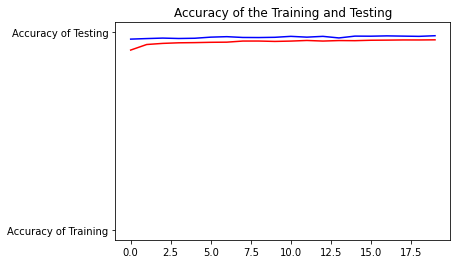

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', 'Accuracy of Training')
plt.plot(epochs, val_acc, 'b', 'Accuracy of Testing')
plt.title('Accuracy of the Training and Testing')
plt.figure()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  image_tensor = np.vstack([x])
  classes = model.predict(image_tensor)
  print(classes)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

#Multiclass

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2022-05-10 12:02:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.187.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.187.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   209MB/s    in 0.9s    

2022-05-10 12:02:29 (209 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2022-05-10 12:02:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.187.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.187.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘

In [ ]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print(f'total number of rock images used for the training: {len(os.listdir(rock_dir))}')
print(f'total number of paper images used for the training: {len(os.listdir(paper_dir))}')
print(f'total number of scissors images used for the training: {len(os.listdir(scissors_dir))}')

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)


total number of rock images used for the training: 840
total number of paper images used for the training: 840
total number of scissors images used for the training: 840


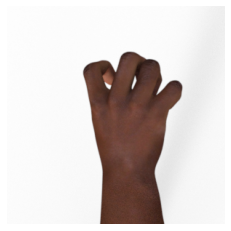

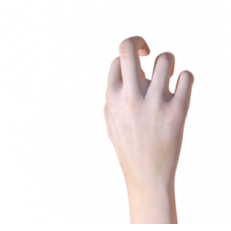

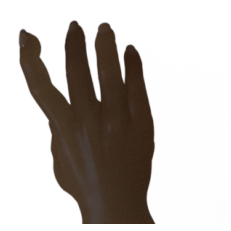

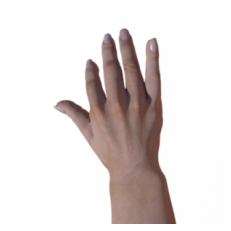

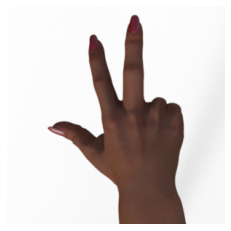

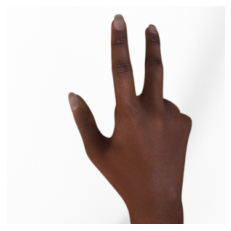

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock + next_paper + next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_94 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_95 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_96 (Conv2D)          (None, 34, 34, 128)       73856     
                                       

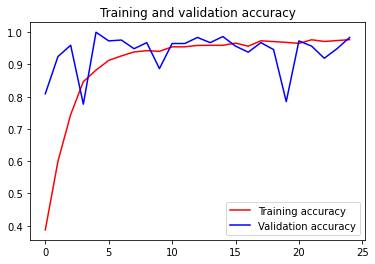

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

#Dropout

In [1]:
import tensorflow as tf

In [2]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached an accuracy of 95% so training is cancelled")
      self.model.stop_training = True

In [3]:
callback = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# normalize the data
training_images = training_images / 255.0
test_images = test_images / 255.0

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
# Build the model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (28,28)),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                    ])

In [5]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

In [6]:
model.fit(training_images, training_labels, epochs=50, callbacks=[callback])

Epoch 1/50
1875/1875 [==============================] - 8s 2ms/step - loss: 0.5906 - accuracy: 0.7902
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4343 - accuracy: 0.8448
Epoch 3/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3914 - accuracy: 0.8589
Epoch 4/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3733 - accuracy: 0.8653
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3565 - accuracy: 0.8717
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3419 - accuracy: 0.8757
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3325 - accuracy: 0.8799
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3234 - accuracy: 0.8814
Epoch 9/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3139 - accuracy: 0.8864
Epoch 10/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.306

In [7]:
# Evaluate on the test set
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3611 - accuracy: 0.8909


[0.36106041073799133, 0.8909000158309937]